# Harry Potter bullet screen analysis - Bilibili

analysis about bullet screen from the movie *Harry Potter and the Sorcerer's Stone* on video website Bilibili

In [1]:
import pandas as pd
import requests
import jieba
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from jieba import analyse

## 弹幕获取 Bullet screen extraction
弹幕列表：contents

In [2]:
# 弹幕位置的固定格式 http://comment.bilibili.com/+cid+.xml
# 详情见文章 https://www.jb51.net/article/236663.htm
# https://api.bilibili.com/x/player/pagelist?bvid=BV1qt411j7fV

url = "https://comment.bilibili.com/112148195.xml"

In [3]:
# 假装浏览器
header ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.80 Safari/537.36 Edg/98.0.1108.43'
}

# 发送请求
req = requests.get(url = url, headers=header)
# 获取内容响应的内容
html_byte = req.content
# 将byte转为str
html_str = str(html_byte,"utf-8")

In [4]:
# 解析
soup = BeautifulSoup(html_str,'html.parser')
#找到html文件里的<d>标签
results = soup.find_all('d')
#把标签里的文本提取出来
contents = [x.text for x in results]
#存为字典
dic ={"contents" : contents}

## 弹幕分析 Bullet screen analysis

### 初始化 initialization

In [5]:
df = pd.DataFrame(dic)
df["contents"]

0                                       除你武器
1                                 大家好，我是青蛙刀圣
2                              罗尼太可爱了小表情哈哈哈哈
3                                       除你武器
4                                好喜欢这个氛围，好温暖
                        ...                 
9502                             这门是往外开的，教授！
9503    这个故事告诉我们，如果你在现实世界里很穷，说不定在另外一个世界里就很富裕
9504                     邓多多：这届我最偏爱的学生就决定是你了
9505                                《当幸福来敲门》
9506                    【物品：哈利的扫帚光轮2000】开始加载
Name: contents, Length: 9507, dtype: object

### 最多弹幕 most frequent bullet screen

In [6]:
df.value_counts()[:20]

contents
除你武器        1357
阿瓦达索命        999
生日快乐          88
梦开始的地方        47
格兰芬多          37
拉文克劳          36
斯莱特林          35
赫奇帕奇          35
阿瓦达啃大瓜        33
阿兹卡班          28
斯莱特林报道        20
生日快乐！         19
阿兹卡班！         19
[ohh]         19
？             17
合影            16
哈哈哈哈哈         14
9¾            14
哈哈哈哈          13
哈哈哈           13
dtype: int64

### 词频统计 word count
results in hp_b_result.txt

In [7]:
jieba.load_userdict("哈利波特词表.txt")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/tq/97hzwp4x569b8bm08dtf2gv40000gn/T/jieba.cache
Loading model cost 0.298 seconds.
Prefix dict has been built successfully.


In [59]:
b_all_danmu_text=' '
for i in df['contents']:
    b_all_danmu_text += i+' '
a = jieba.lcut(b_all_danmu_text, cut_all=False)

In [60]:
counts={}
for word in a:
    counts[word] = counts.get(word,0)+1

In [61]:
# excludes = {"，","：","“","。","”","、","；","！","？","."}
excludes=[]
tingyongci = open("停用词.txt",'r')
print(tingyongci.readline()[:-1])
for i in tingyongci.readlines():
    excludes.append(i[:-1])
for word in excludes:
    try:
        del counts[word]
    except:
        pass

!


In [62]:
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse = True)

In [63]:
hp_qq_result = open("hp_b_result.txt","w")
for i in range(200):
    word, count = items[i]
    hp_qq_result.writelines("{0:<10}{1:>5}\n".format(word,count))
hp_qq_result.close()

In [64]:
test_word = "哈哈"

count = 0
for i in df["contents"]:
    if test_word in i:
        count+=1

print(count)

336


### 情感分析 sentiment analysis

In [65]:
from snownlp import SnowNLP

In [66]:
df['emotion'] = df['contents'].apply(lambda x: SnowNLP(x).sentiments)
df.head()

,contents,emotion
0,除你武器,0.700000
1,大家好，我是青蛙刀圣,0.960687
2,罗尼太可爱了小表情哈哈哈哈,0.935794
3,除你武器,0.700000
4,好喜欢这个氛围，好温暖,0.995823


In [67]:
df['emotion'].describe()

count    9507.000000
mean        0.671860
std         0.247641
min         0.000130
25%         0.500000
50%         0.700000
75%         0.858738
max         1.000000
Name: emotion, dtype: float64

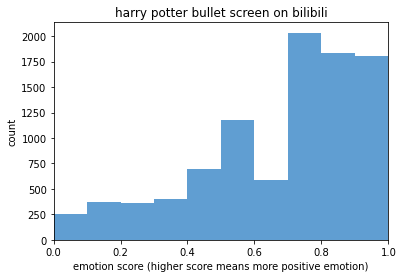

In [68]:
#  绘制情感分直方图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
 
bins = np.arange(0, 1.1, 0.1)
plt.hist(df['emotion'], bins, color = '#4F94CD', alpha=0.9)
plt.xlim(0, 1)
plt.xlabel('emotion score (higher score means more positive emotion)')
plt.ylabel('count')
plt.title('harry potter bullet screen on bilibili')
plt.show()

In [69]:
key_words = jieba.analyse.extract_tags(sentence=b_all_danmu_text, topK=10, withWeight=True, allowPOS=())
key_words

[('除你武器', 0.7479784015244205),
 ('阿瓦达索命', 0.5611180399088438),
 ('哈哈哈', 0.22802181044880074),
 ('哈利', 0.2097767668852767),
 ('生日快乐', 0.11648632703173284),
 ('格兰芬多', 0.08537585487608246),
 ('斯莱特林', 0.07893239413071775),
 ('拉文克劳', 0.06389765239153342),
 ('罗恩', 0.06212201872552551),
 ('哈哈哈哈', 0.06140558253655138)]

In [70]:
df_bad=df[df['emotion']<0.2]
df_bad.head()

,contents,emotion
18,赫奇帕奇,0.193012
32,0,0.034483
34,树:我招你了？干嘛砍我,0.019594
37,顺序乱了，应该按字母顺序来的,0.001617
67,卧槽卧槽卧槽不敢相信！,0.172117


In [71]:
bad_text = ''
for i in df_bad['contents']:
    bad_text += i
# 消极评论关键词
# most frequent words in negative comments
key_words = jieba.analyse.extract_tags(sentence=bad_text, topK=100, withWeight=True, allowPOS=())
key_words

[('赫奇帕奇', 0.3570637048539919),
 ('斯莱特林', 0.0961325359222286),
 ('合影', 0.08480504369911546),
 ('格兰芬多', 0.06866609708730614),
 ('海格', 0.057504345966226306),
 ('扣分', 0.05174782457162551),
 ('黑幕', 0.05143303009793797),
 ('海德', 0.045001948395347505),
 ('飞贼', 0.04449870772848938),
 ('哈利', 0.04449870772848938),
 ('为啥', 0.04223733533658817),
 ('不是', 0.04135921465979322),
 ('小天狼星', 0.041199658252383684),
 ('那个', 0.03271192903223435),
 ('卧槽', 0.03193722608156232),
 ('鬼才', 0.031465360921309596),
 ('昏昏', 0.03015359066714532),
 ('原著', 0.029187271779724296),
 ('好像', 0.029036403299155657),
 ('邓布利多', 0.027466438834922457),
 ('bushi', 0.027466438834922457),
 ('赫敏', 0.027466438834922457),
 ('倒地', 0.025531425496496264),
 ('现场', 0.025379941311016656),
 ('爆破', 0.02480754584454337),
 ('当时', 0.02417150230020103),
 ('德拉科', 0.023952919561171737),
 ('这个', 0.022539101751642737),
 ('一万三千五百斤', 0.021564129737334865),
 ('分院', 0.021523442065066054),
 ('斗篷', 0.0212887964704193),
 ('一换', 0.020599829126191842),
 ('进度条',

In [72]:
#接下来用刚才的消极词汇做搜索确认结果
df[df['contents'].str.contains("疫情")]

,contents,emotion
5863,疫情结束我要去环球影城,0.765389
7199,我们那届疫情封校了，焯,0.593406


In [73]:
df[df['contents'].str.contains("北京")]

,contents,emotion
9154,北京环球的奥利凡真不错,0.84228


In [74]:
df[df['contents'].str.contains("会员")]

,contents,emotion


In [75]:
df[df['contents'].str.contains("VIP")]

,contents,emotion
